In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
# Load the dataset
df = pd.read_csv('solar_power_output.csv')

# Display the first few rows to understand the structure
print(df.head())


   temperature   humidity  solar_irradiance  wind_speed  solar_power_output
0    19.363503  75.852937        266.619636    5.190818          128.101772
1    33.767858  62.887709        587.710853    4.791819          290.911789
2    28.299849  44.762209        885.651252    0.256421          442.336390
3    24.966462  85.103602        759.002398    3.412478          380.261988
4    13.900466  74.778494        825.905033    3.801956          415.931953


In [3]:
# Check for missing values
print(df.isnull().sum()) 
df = df.dropna()

temperature           0
humidity              0
solar_irradiance      0
wind_speed            0
solar_power_output    0
dtype: int64


In [4]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = df[['temperature','humidity','solar_irradiance','wind_speed']]  
# Dependent variable (Energy Consumption)
y = df['solar_power_output']  

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
y_pred

array([145.57713107,  58.80813607, 162.02529472, 389.82145928,
       499.91950594, 201.0282157 , 280.32773311, 343.94995963,
       207.65845171, 274.08855807, 270.4758993 ,  71.45181397,
       429.2717113 , 474.93452177, 131.00879232, 488.72382531,
       351.97648481,  66.01156114, 286.53039285, 315.26996554,
       156.25649583, 217.68415494, 328.50926609, 456.09724416,
       224.5996492 , 343.33441394, 258.65661936, 253.27035924,
       487.33886964, 488.13938702, 352.87341423, 139.35221981,
       486.2457442 , 166.59050109, 443.99714231, 498.93693591,
       440.23818941, 184.21480104, 497.81182991, 239.22808162,
       345.26650268, 281.34107991, 215.84679473, 472.53738059,
       105.19383876, 353.92961078, 132.62179771, 496.30985098,
       472.03357268, 464.32390435,  68.39576647, 337.05784428,
       271.45779664, 142.00782194, 330.57420011, 209.16463829,
       431.33413852, 460.5254782 , 271.68335513, 148.17216826,
       322.32496321, 189.54364635, 148.80585848,  54.32

In [9]:
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 29.46234596824654
R-Squared: 0.9983255901416407


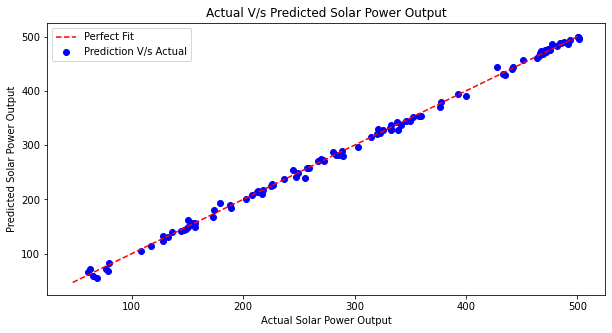

In [11]:
# Scatter plot tocompare actual vs predicted values
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred, color='blue', label='Prediction V/s Actual')
# Diagonal line for perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red', linestyle = '--', label = 'Perfect Fit')
plt.xlabel('Actual Solar Power Output')
plt.ylabel('Predicted Solar Power Output')
plt.title('Actual V/s Predicted Solar Power Output')
plt.legend()
plt.show()

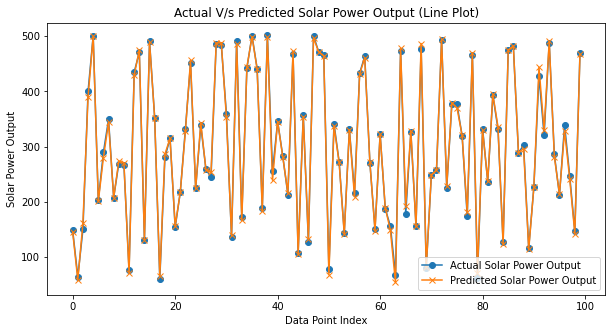

In [13]:
# Line plot to show predictions and actual values
plt.figure(figsize = (10, 5))
plt.plot(range(len(y_test)), y_test, label = "Actual Solar Power Output", marker = 'o')
plt.plot(range(len(y_test)), y_pred, label = "Predicted Solar Power Output", marker = 'x')
plt.xlabel('Data Point Index')
plt.ylabel('Solar Power Output')
plt.title('Actual V/s Predicted Solar Power Output (Line Plot)')
plt.legend()
plt.show()

In [16]:
# Save the trained model
joblib.dump(model, 'solar_power_prediction_model.pkl')

['solar_power_prediction_model.pkl']

In [21]:
# Load the saved model
model = joblib.load('solar_power_prediction_model.pkl')
# New input data for prediction
# Example input (temperature, humidity, solar_irradiance, wind_speed)
new_data = np.array([[19.36, 75.85, 266.61, 5.19]])
#Prediction
pred_output = model.predict(new_data)
print(f"Predicted Solar Power Output: {pred_output[0]} watts")

Predicted Solar Power Output: 132.6167057318901 watts
